# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [32]:
df = pd.read_csv("cement_slump.csv")
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820
...,...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000,49.970
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000,50.500
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000,49.170


# EDA and Graphical analysis

In [33]:
df.shape

(103, 10)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [35]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [121]:
df.corr()["Compressive Strength (28-day)(Mpa)"]

Cement                                0.446
Slag                                 -0.332
Fly ash                               0.444
Water                                -0.254
SP                                   -0.038
Coarse Aggr.                         -0.161
Fine Aggr.                           -0.155
SLUMP(cm)                            -0.223
FLOW(cm)                             -0.124
Compressive Strength (28-day)(Mpa)    1.000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

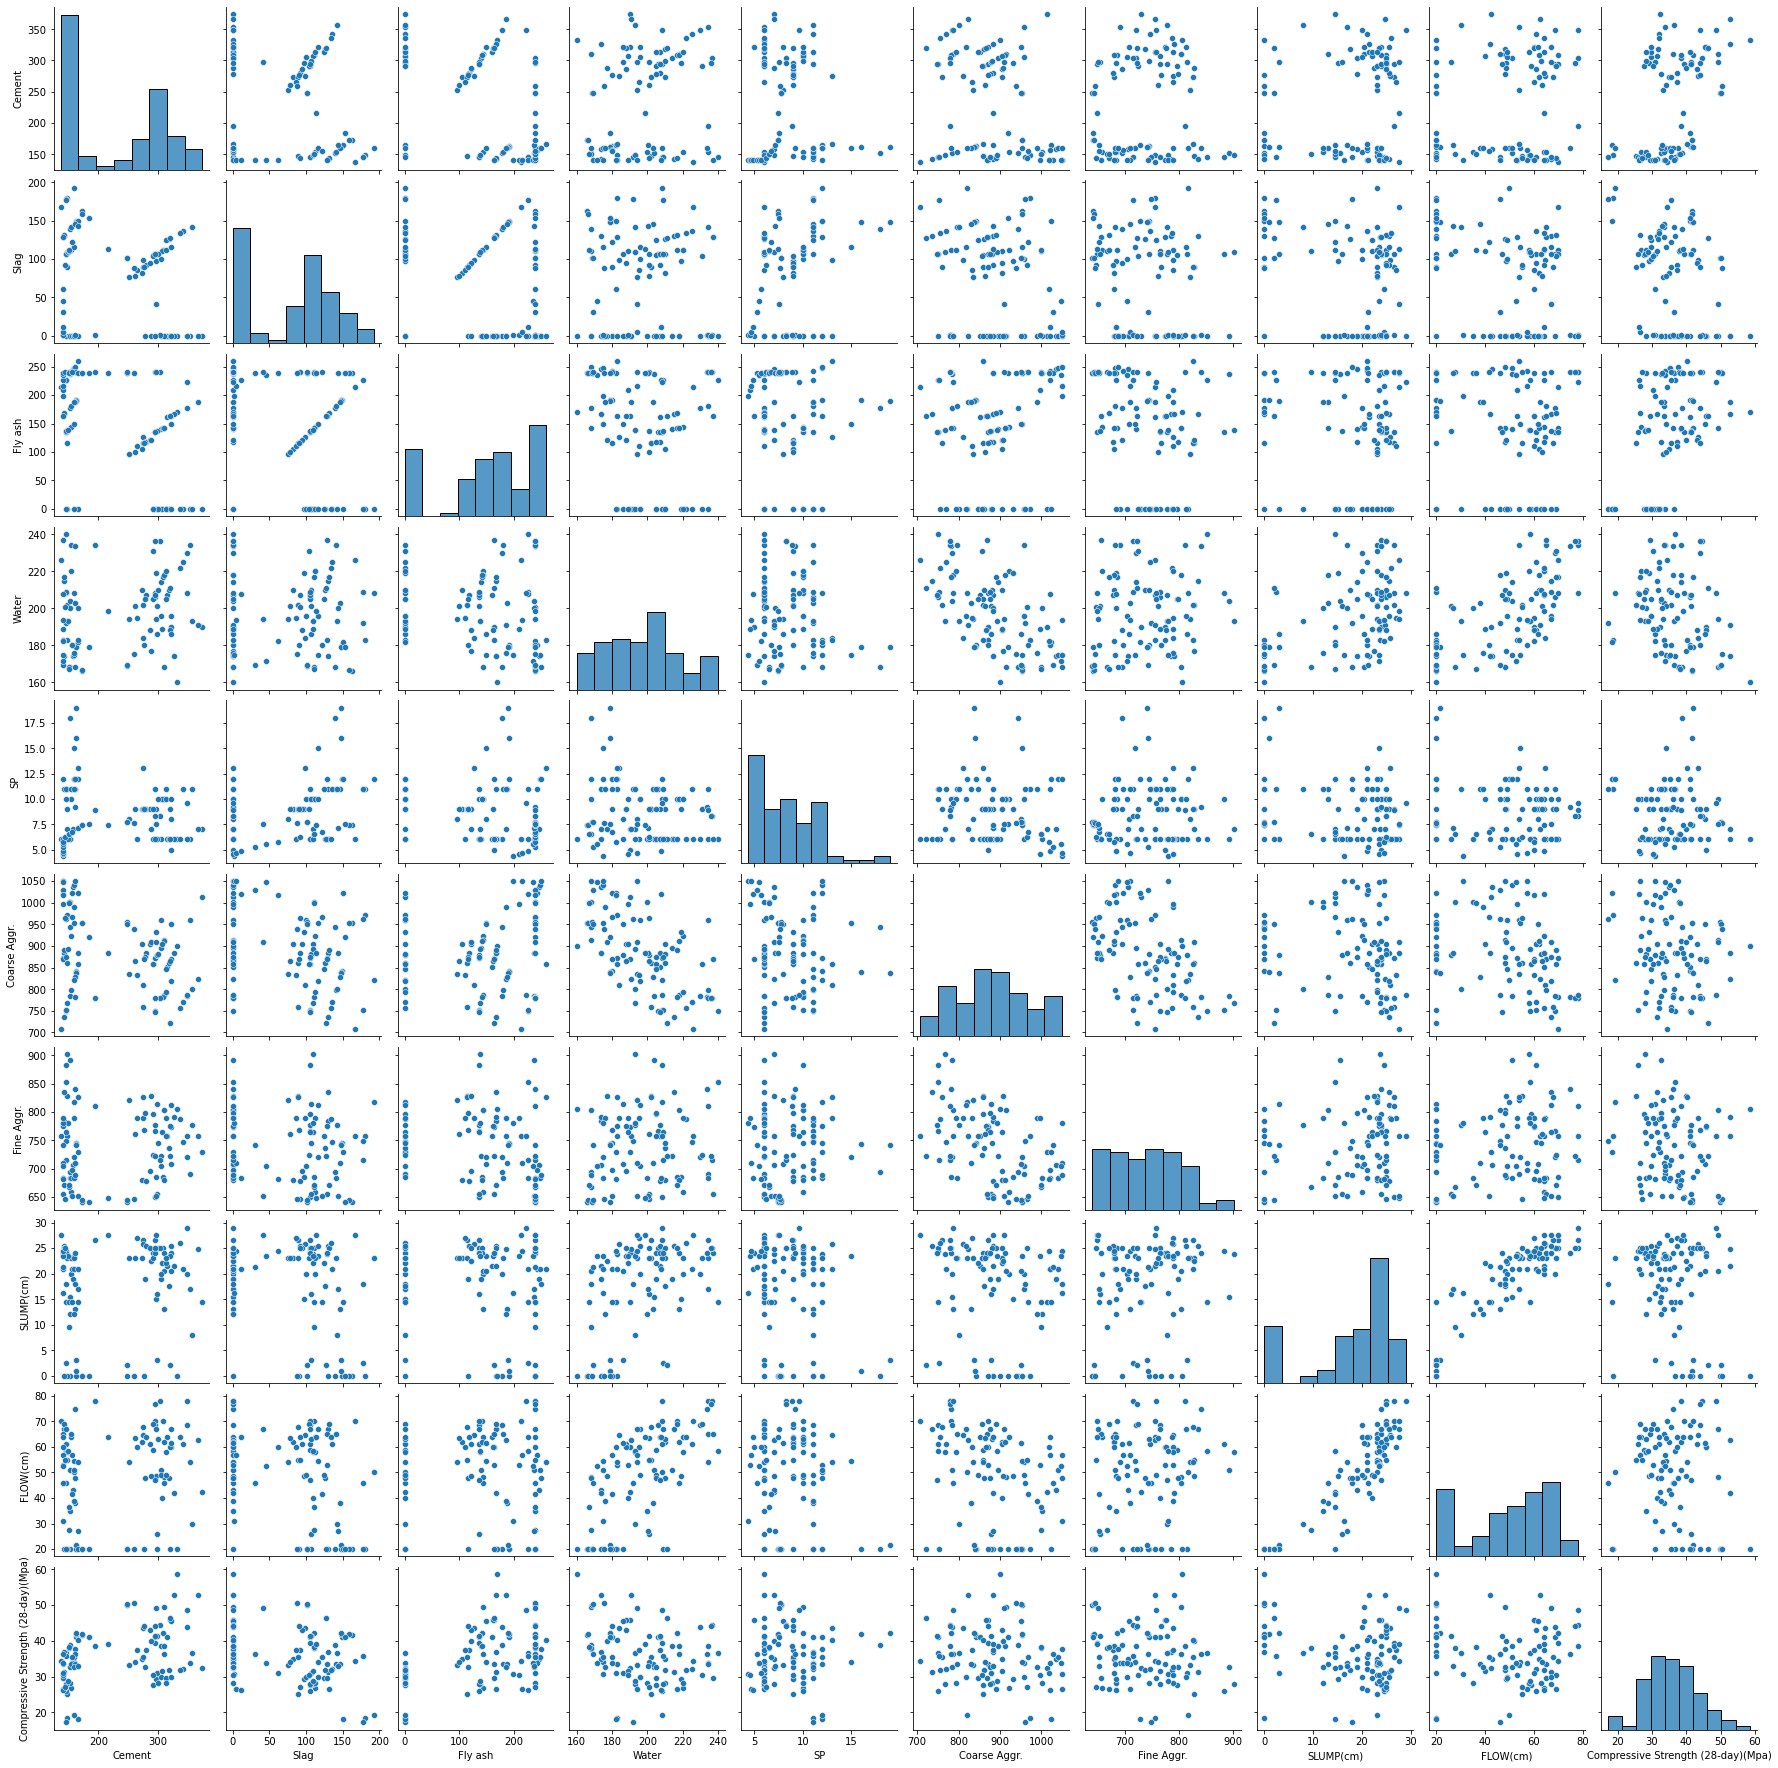

In [36]:
sns.pairplot(df)

<AxesSubplot:>

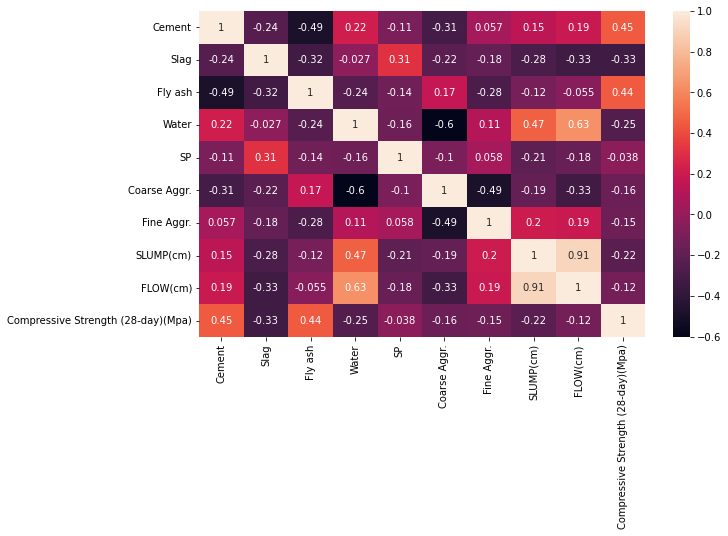

In [37]:
sns.heatmap(df.corr(), annot=True)

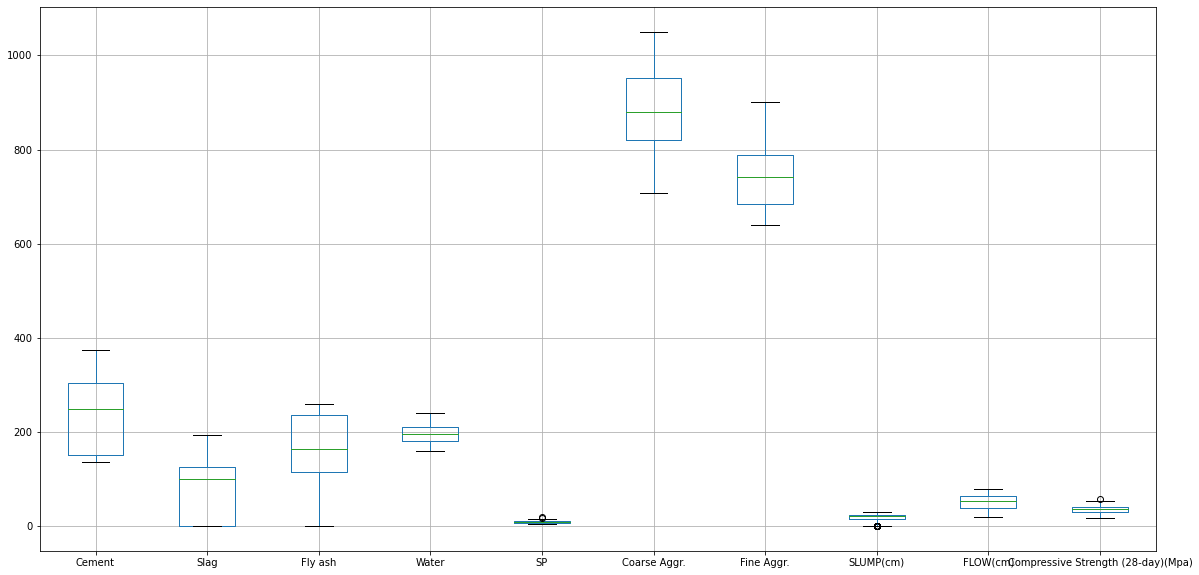

In [123]:
plt.figure(figsize =(20,10))
df.boxplot()
plt.show()

# Data Preprocessing 

### Features and target variable
* Split the data into features and target variable

In [38]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [39]:
X = df.drop(columns="Compressive Strength (28-day)(Mpa)")
y = df["Compressive Strength (28-day)(Mpa)"]

### Splitting data into training and testing
* Split the data into training and testing sets

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
scaler.fit(X_train) # Apply just for X_train not for X_test(kalıp çıkarma)

StandardScaler()

In [43]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.99742015, -1.29720985, -0.03597016,  1.05552803,  0.49979299,
         0.26854971, -0.94918597,  0.70678525,  0.76407019],
       [-1.04096079,  1.65777393, -1.64936204, -0.65655824,  0.84332212,
         0.95172686,  0.28924939, -1.96043118, -1.59112335],
       [ 1.13668842,  0.78769537,  0.21399196,  0.71311078, -0.87432353,
        -1.90623086, -0.2575922 , -1.73816315, -1.59112335],
       [ 0.85815189,  0.45936384, -1.64936204, -0.50980799, -0.87432353,
        -0.10719771,  1.2220968 , -1.62702913, -1.59112335],
       [ 0.22891256,  0.36086438,  1.06727175, -1.34628443, -0.29032401,
         0.74905097, -1.58287887, -1.96043118, -1.59112335],
       [-0.90169252,  0.60711303,  0.04356324, -1.04789225,  2.21743863,
         0.73538743, -0.30584293,  0.65121824,  0.34349992],
       [ 0.80750889,  0.44294726, -0.10414165,  0.51744378, -0.87432353,
        -1.61018743,  0.62700448,  0.70678525, -0.07707036],
       [-0.93967478, -1.29720985,  1.11158322, -0.80330849,  0

In [44]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.14934917, -1.29720985,  0.21399196, -0.31414099, -1.21785265,
        -0.20967429,  0.56267018,  0.70678525,  0.65191812],
       [-0.81306726, -1.29720985,  1.30473577, -0.65655824,  1.53038037,
        -0.33492343,  1.41509971,  0.37338319,  0.3154619 ],
       [ 0.87081264,  0.45936384, -1.64936204,  0.66419403,  0.49979299,
        -0.08442514,  0.09624647,  0.81791927,  0.82014623],
       [ 0.71888363,  0.24594834, -0.27457037, -0.41197449,  0.15626386,
         0.17745943, -0.69184876,  0.81791927,  0.70799416],
       [-0.88903177,  1.09961032,  0.48667792,  0.32177677,  0.84332212,
        -0.676512  , -0.46667869, -0.51568895, -0.58175469],
       [-1.07894304,  1.6085242 ,  0.92979259,  0.61527728,  0.84332212,
        -1.553256  , -0.38626081, -1.68259614, -1.59112335],
       [-0.94727123,  0.70725415,  1.07749748, -0.80820017, -0.63385314,
         0.89251817, -1.39148432, -0.34898792, -0.38548856],
       [ 1.11136691,  0.77127879, -1.64936204,  0.66419403, -0

##  1. Model Building (Linear Regression)
* Build a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
linear_model = LinearRegression()

In [47]:
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
y_pred = linear_model.predict(X_test_scaled)
y_train_pred = linear_model.predict(X_train_scaled)

### 1.1 Interpret the model
* Interpret the model by looking at the coefficients

In [49]:
linear_model.coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [50]:
linear_model.intercept_

35.84719512195121

### 1.2 Model Evaluation
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [52]:
linear_score = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
linear_score

,linear_train,linear_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


##### Cross-Validation

In [53]:
from sklearn.model_selection import cross_validate

In [54]:
scores = cross_validate(linear_model, X_train_scaled, y_train,
                        scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                        cv = 5)

In [55]:
pd.DataFrame(scores, index=range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001,0.001,0.942,-1.909,-4.645,-2.155
2,0.001,0.000,0.707,-2.647,-10.757,-3.280
3,0.000,0.001,0.866,-1.483,-3.726,-1.930
4,0.001,0.001,0.923,-2.244,-8.434,-2.904
5,0.001,0.001,0.793,-2.868,-11.698,-3.420


In [56]:
scores = pd.DataFrame(scores, index=range(1,6)).iloc[:,2:].mean()
scores

test_r2                             0.846
test_neg_mean_absolute_error       -2.230
test_neg_mean_squared_error        -7.852
test_neg_root_mean_squared_error   -2.738
dtype: float64

In [57]:
# Linear Regression Score = 0.846

# 2. Regularization
* Regularize the model by adding a regularization term to the loss function.

## 2.1 Ridge (Apply and evaluate)
* Build a Ridge regression model, fit the model, and make predictions on the test and train set, and compare them.


In [58]:
from sklearn.linear_model import Ridge, RidgeCV

In [59]:
ridge_model = Ridge(alpha=1, random_state=42)

In [60]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [62]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [63]:
ridge_score = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
ridge_score

,ridge_train,ridge_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.922,4.493
rmse,2.434,2.120


##### Choosing Best Alpha Value With Cross Validation

In [64]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [65]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv=5, scoring="neg_root_mean_squared_error")

In [66]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [67]:
ridge_cv_model.alpha_

0.62

In [68]:
ridge_cv_model.best_score_

-2.701224217170792

In [69]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [70]:
ridge_cv_scores = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
ridge_cv_scores

,ridge_cv_train,ridge_cv_test
R2,0.907,0.912
mae,1.937,1.732
mse,5.900,4.460
rmse,2.429,2.112


In [74]:
pd.concat([ridge_score, ridge_cv_scores], axis=1)

,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.906,0.911,0.907,0.912
mae,1.938,1.732,1.937,1.732
mse,5.922,4.493,5.900,4.460
rmse,2.434,2.120,2.429,2.112


In [75]:
# Ridge_cv_test score = 0.912

## 2.2 Lasso (Apply and evalute)
* Build a Lasso regression model, fit the model, and make predictions on the test and train set, and compare them.

In [76]:
from sklearn.linear_model import Lasso, LassoCV

In [78]:
lasso_model = Lasso(alpha=1, random_state=42)

In [79]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [80]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [81]:
lasso_score = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lasso_score

,lasso_train,lasso_test
R2,0.776,0.802
mae,2.960,2.466
mse,14.144,10.036
rmse,3.761,3.168


##### Choosing Best Alpha Value With Cross-Validation

In [82]:
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [83]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv=5, max_iter=1000000, random_state=42)

In [84]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=1000000, random_state=42)

In [86]:
lasso_cv_model.alpha_
# en alt sınıra dayandı yeniden bir aralık belirtip tekrar deneyeceğim.

0.01

In [96]:
alpha_space_2 = np.linspace(0, 0.01, 100)
alpha_space_2

array([0.        , 0.00010101, 0.00020202, 0.00030303, 0.00040404,
       0.00050505, 0.00060606, 0.00070707, 0.00080808, 0.00090909,
       0.0010101 , 0.00111111, 0.00121212, 0.00131313, 0.00141414,
       0.00151515, 0.00161616, 0.00171717, 0.00181818, 0.00191919,
       0.0020202 , 0.00212121, 0.00222222, 0.00232323, 0.00242424,
       0.00252525, 0.00262626, 0.00272727, 0.00282828, 0.00292929,
       0.0030303 , 0.00313131, 0.00323232, 0.00333333, 0.00343434,
       0.00353535, 0.00363636, 0.00373737, 0.00383838, 0.00393939,
       0.0040404 , 0.00414141, 0.00424242, 0.00434343, 0.00444444,
       0.00454545, 0.00464646, 0.00474747, 0.00484848, 0.00494949,
       0.00505051, 0.00515152, 0.00525253, 0.00535354, 0.00545455,
       0.00555556, 0.00565657, 0.00575758, 0.00585859, 0.0059596 ,
       0.00606061, 0.00616162, 0.00626263, 0.00636364, 0.00646465,
       0.00656566, 0.00666667, 0.00676768, 0.00686869, 0.0069697 ,
       0.00707071, 0.00717172, 0.00727273, 0.00737374, 0.00747

In [97]:
lasso_cv_model = LassoCV(alphas=alpha_space_2, cv=5, max_iter=1000000, random_state=42)

In [98]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.        , 0.00010101, 0.00020202, 0.00030303, 0.00040404,
       0.00050505, 0.00060606, 0.00070707, 0.00080808, 0.00090909,
       0.0010101 , 0.00111111, 0.00121212, 0.00131313, 0.00141414,
       0.00151515, 0.00161616, 0.00171717, 0.00181818, 0.00191919,
       0.0020202 , 0.00212121, 0.00222222, 0.00232323, 0.00242424,
       0.00252525, 0.00262626, 0.00272727, 0.00282828, 0.00292929,
       0.003030...
       0.00707071, 0.00717172, 0.00727273, 0.00737374, 0.00747475,
       0.00757576, 0.00767677, 0.00777778, 0.00787879, 0.0079798 ,
       0.00808081, 0.00818182, 0.00828283, 0.00838384, 0.00848485,
       0.00858586, 0.00868687, 0.00878788, 0.00888889, 0.0089899 ,
       0.00909091, 0.00919192, 0.00929293, 0.00939394, 0.00949495,
       0.00959596, 0.00969697, 0.00979798, 0.00989899, 0.01      ]),
        cv=5, max_iter=1000000, random_state=42)

In [99]:
lasso_cv_model.alpha_

0.0

In [100]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [101]:
lasso_cv_score = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lasso_cv_score

,lasso_cv_train,lasso_cv_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


In [102]:
pd.concat([lasso_score, lasso_cv_score], axis=1)

,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.776,0.802,0.907,0.912
mae,2.960,2.466,1.936,1.740
mse,14.144,10.036,5.874,4.454
rmse,3.761,3.168,2.424,2.111


## 2.3 Elastic-Net (Apply and evaluate )

---

* Build an Elastic-Net regression model, fit the model, and make predictions on the test and train set, and compare them.
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [103]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [104]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [105]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [106]:
elastic_score = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
elastic_score

,elastic_train,elastic_test
R2,0.637,0.635
mae,3.803,3.556
mse,22.982,18.466
rmse,4.794,4.297


##### Choosing Best alpha and l1_ratio With GridSearch

In [111]:
param_grid = {"alpha":[0, 0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [112]:
grid_model = GridSearchCV(estimator=elastic_model, param_grid=param_grid,
                          scoring="neg_root_mean_squared_error", cv=5, verbose=5)

In [113]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END ............alpha=0, l1_ratio=0.1;, score=-2.155 total time=   0.0s
[CV 2/5] END ............alpha=0, l1_ratio=0.1;, score=-3.280 total time=   0.0s
[CV 3/5] END ............alpha=0, l1_ratio=0.1;, score=-1.930 total time=   0.0s
[CV 4/5] END ............alpha=0, l1_ratio=0.1;, score=-2.904 total time=   0.0s
[CV 5/5] END ............alpha=0, l1_ratio=0.1;, score=-3.420 total time=   0.0s
[CV 1/5] END ............alpha=0, l1_ratio=0.5;, score=-2.155 total time=   0.0s
[CV 2/5] END ............alpha=0, l1_ratio=0.5;, score=-3.280 total time=   0.0s
[CV 3/5] END ............alpha=0, l1_ratio=0.5;, score=-1.930 total time=   0.0s
[CV 4/5] END ............alpha=0, l1_ratio=0.5;, score=-2.904 total time=   0.0s
[CV 5/5] END ............alpha=0, l1_ratio=0.5;, score=-3.420 total time=   0.0s
[CV 1/5] END ............alpha=0, l1_ratio=0.7;, score=-2.155 total time=   0.0s
[CV 2/5] END ............alpha=0, l1_ratio=0.7;

[CV 3/5] END ..........alpha=0.5, l1_ratio=0.7;, score=-2.716 total time=   0.0s
[CV 4/5] END ..........alpha=0.5, l1_ratio=0.7;, score=-4.974 total time=   0.0s
[CV 5/5] END ..........alpha=0.5, l1_ratio=0.7;, score=-3.544 total time=   0.0s
[CV 1/5] END ..........alpha=0.5, l1_ratio=0.9;, score=-3.137 total time=   0.0s
[CV 2/5] END ..........alpha=0.5, l1_ratio=0.9;, score=-3.583 total time=   0.0s
[CV 3/5] END ..........alpha=0.5, l1_ratio=0.9;, score=-2.503 total time=   0.0s
[CV 4/5] END ..........alpha=0.5, l1_ratio=0.9;, score=-4.373 total time=   0.0s
[CV 5/5] END ..........alpha=0.5, l1_ratio=0.9;, score=-3.359 total time=   0.0s
[CV 1/5] END .........alpha=0.5, l1_ratio=0.95;, score=-2.904 total time=   0.0s
[CV 2/5] END .........alpha=0.5, l1_ratio=0.95;, score=-3.575 total time=   0.0s
[CV 3/5] END .........alpha=0.5, l1_ratio=0.95;, score=-2.458 total time=   0.0s
[CV 4/5] END .........alpha=0.5, l1_ratio=0.95;, score=-4.218 total time=   0.0s
[CV 5/5] END .........alpha=

GridSearchCV(cv=5, estimator=ElasticNet(alpha=1, random_state=42),
             param_grid={'alpha': [0, 0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=5)

In [115]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [116]:
grid_model.best_score_

-2.7021815548630648

##### Using Best Hyper Parameters From GridSearch

In [118]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [119]:
elastic_gs_score = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
elastic_gs_score

,GridSearch_train,GridSearch_test
R2,0.907,0.912
mae,1.937,1.731
mse,5.908,4.470
rmse,2.431,2.114


In [124]:
pd.concat([linear_score, ridge_score, ridge_cv_scores, lasso_score, lasso_cv_score, elastic_score, elastic_gs_score], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,GridSearch_train,GridSearch_test
R2,0.907,0.912,0.906,0.911,0.907,0.912,0.776,0.802,0.907,0.912,0.637,0.635,0.907,0.912
mae,1.936,1.740,1.938,1.732,1.937,1.732,2.960,2.466,1.936,1.740,3.803,3.556,1.937,1.731
mse,5.874,4.454,5.922,4.493,5.900,4.460,14.144,10.036,5.874,4.454,22.982,18.466,5.908,4.470
rmse,2.424,2.111,2.434,2.120,2.429,2.112,3.761,3.168,2.424,2.111,4.794,4.297,2.431,2.114
